<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Variables-to-control" data-toc-modified-id="Variables-to-control-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Variables to control</a></span></li><li><span><a href="#Load-and-plot-results" data-toc-modified-id="Load-and-plot-results-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and plot results</a></span></li></ul></div>

# Validate 2 channels optimal configuration results

In [23]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

from qcd.optimizationresults.globaloptimizationresults import GlobalOptimizationResults
from qcd.optimizationresults.globaloptimizationresults.global_aux import build_optimization_result
from qcd import save_object_to_disk, load_object_from_file
import numpy as np

## Variables to control

In [30]:
# Filenames with results for 3 etas and their optimized parameters to LOAD
# filename = '20210321_results_CRS'
# filename = '20210331_C1_CRS_clons'
# filename = '20210502b_C1_A1_1000_10000_2_0_20'
# filename = '20210413a_C2_A2_500_10000'
# filename = '20210508a_C2_A1_4000_10000'
# filename = '20210509a_C2_A2_4000_10000'
filename = '20211009a_C1_A1_1000_10000_2_0_20'
filename_one_qubit_validated = '20211009a_C1_A1_1000_10000_2_0_20_validated_1000000'
filename_two_qubits_validated = '20210509a_C2_A2_4000_100000_2_0_20_validated_1000000'
# filename = '20210501a_C1_A1_1000_10000_2_1_20'
path = 'results/'


In [31]:
results = GlobalOptimizationResults.load_results(file_names=filename, path=path)

In [32]:
results.validate_optimal_configurations_one_qubit(plays=1000000)

number of eta groups to validate: 15
Going to validate this eta group: (18, 0)
Optimal Probability: 55.39% Validated Probability: 54.78 % Difference (absolute value): 0.61%
Group of etas # 0 of 15
total time taken so far: 0 minutes and 2 seconds
total seconds of validation: 42
Probability differences --> MAX: 1.02% , MIN: 0.0%
Results ready to be displayed. 😎 


In [34]:
save_object_to_disk(results, name=filename_one_qubit_validated, path=path)

## Load and plot results

In [35]:
validated_results_one_qubit = load_object_from_file(name=filename_one_qubit_validated, path='results/')

In [36]:
validated_results_two_qubits = load_object_from_file(name=filename_two_qubits_validated, path='results/')

In [37]:
results = GlobalOptimizationResults([
    validated_results_one_qubit.validated_optimal_configurations,
    validated_results_two_qubits.validated_optimal_configurations])

min: 0.0, max 0.999907


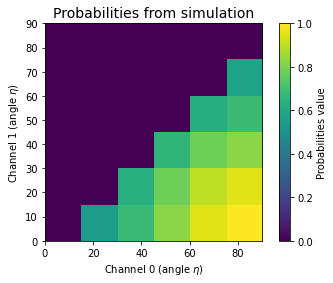

In [38]:
results.plot_probabilities(results_index=0)

min: 0.0, max 0.999889


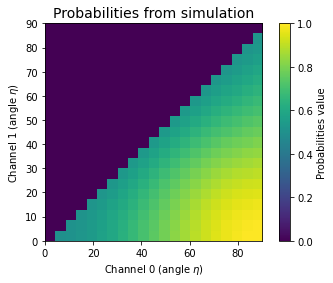

In [39]:
results.plot_probabilities(results_index=1)

min: 0.0, max 0.026471971055006316


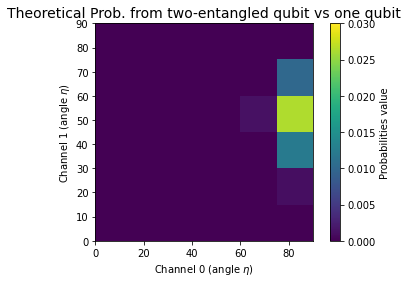

In [40]:
results.plot_theoretical_probabilities_comparison(first_strategy = 'one_shot_side_entanglement',
                                                  second_strategy= 'one_shot',
                                                 vmin=-0.0,
                                                  vmax=0.03,
                                                 title='Theoretical Prob. from two-entangled qubit vs one qubit')

min: 0.0, max 0.026471971055006316


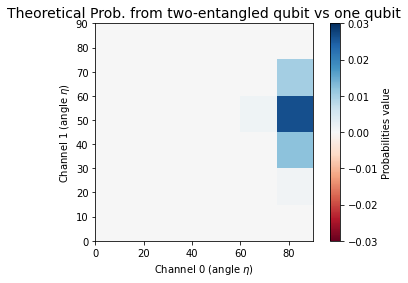

In [41]:
results.plot_theoretical_probabilities_comparison(first_strategy = 'one_shot_side_entanglement',
                                                  second_strategy= 'one_shot',
                                                 vmin=-0.03,
                                                  vmax=0.03,
                                                 title='Theoretical Prob. from two-entangled qubit vs one qubit',
                                                 cmap='RdBu')

min: -0.002970499999999987, max 0.027112000000000025


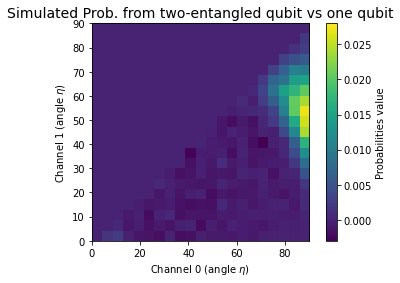

In [35]:
results.plot_probabilities_comparison(results_index1=1,
                                      results_index2=0,
                                      vmin=-0.003,
                                      vmax=0.028,
                                     title='Simulated Prob. from two-entangled qubit vs one qubit',
                                     cmap='viridis')

min: -0.002970499999999987, max 0.027112000000000025


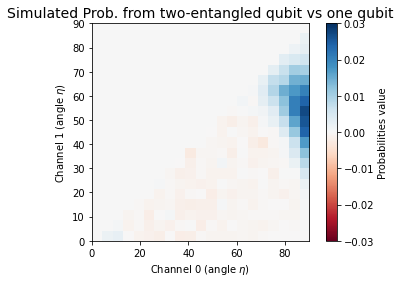

In [38]:
results.plot_probabilities_comparison(results_index1=1,
                                      results_index2=0,
                                      vmin=-0.03,
                                      vmax=0.03,
                                     title='Simulated Prob. from two-entangled qubit vs one qubit')

## Plotting Two Qubit Optimization & Validated Results

In [7]:
validated_results = load_object_from_file(name=filename_two_qubits_validated, path='results/')

min: 0.0, max 0.99998


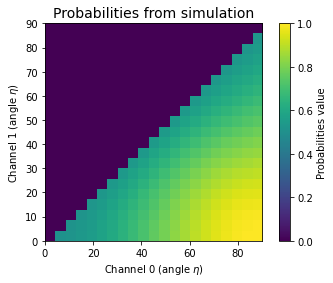

In [8]:
validated_results.plot_probabilities(results_index=0)

min: 0.0, max 0.999889


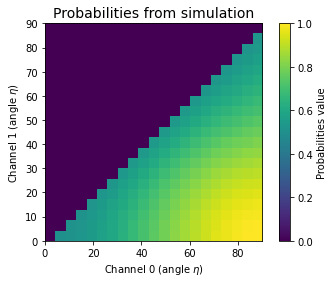

In [9]:
validated_results.plot_probabilities(results_index=1)

min: 0.0, max 0.007279999999999953


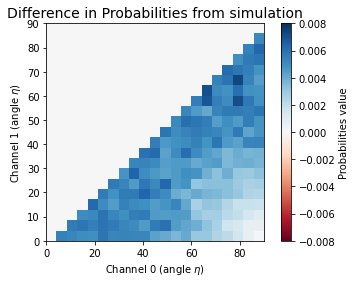

In [11]:
validated_results.plot_probabilities_comparison(results_index1=0,
                                      results_index2=1,
                                      vmin=-0.008,
                                    vmax=0.008)

min: -0.00639207189869706, max 2.0000000000020002e-05


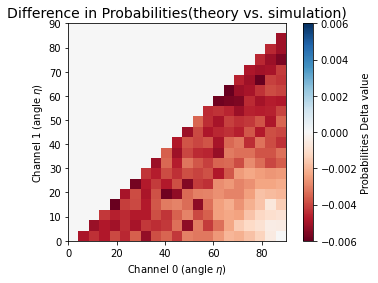

In [14]:
validated_results.plot_probabilities_comparison_with_theoretical_result(results_index=0,
                                                              strategy='one_shot_side_entanglement',
                                                              vmin= -0.006,
                                                              vmax= 0.006)

min: -0.00045868415361238757, max 0.0026298648537946834


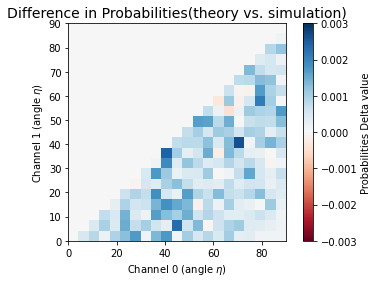

In [16]:
validated_results.plot_probabilities_comparison_with_theoretical_result(results_index=1,
                                                              strategy='one_shot_side_entanglement',
                                                              vmin= -0.003,
                                                              vmax= 0.003)

min: -0.07649716932181498, max 0.44897369568930523


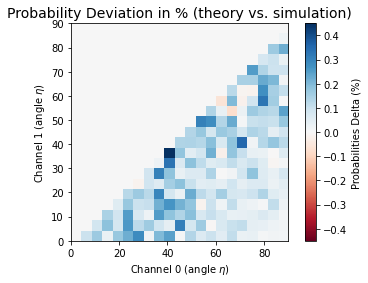

In [18]:
validated_results.plot_probabilities_comparison_percentage(results_index=1,
                                                 strategy='one_shot_side_entanglement',
                                                 vmin= -0.45,
                                                 vmax= 0.45)

min: -0.16255144032921812, max 0.14724470595064132


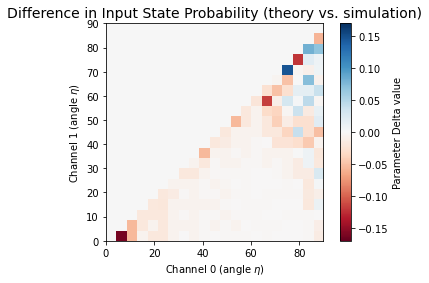

In [20]:
validated_results.plot_amplitudes_comparison_with_theoretical_result(results_index=1,
                                                            strategy='one_shot_side_entanglement',
                                                            vmin = -0.17,
                                                            vmax = 0.17)

min: 0.0, max 0.537037037037037


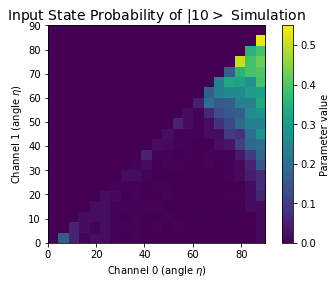

In [24]:
validated_results.plot_amplitudes(results_index=1, 
                                  vmin=0,
                                  vmax=0.55,
                                  title='Input State Probability of $|10>$ Simulation')

min: 0.0, max 0.537037037037037


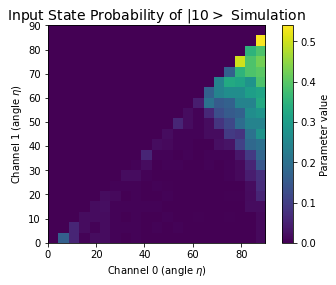

In [26]:
validated_results.plot_amplitudes(results_index=0, 
                                  vmin=0,
                                  vmax=0.54,
                                  title='Input State Probability of $|10>$ Simulation')